<a href="https://colab.research.google.com/github/seijimorimoto/CE888-Data-Science/blob/master/Lab2/CE888_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 2. Bootstrapping in Python**

##**I. Using Customers Data and Implementing Bootstrap Functions**

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(sample, sample_size, n_iterations):
  samples = np.zeros((n_iterations, sample_size))
  for i in range(n_iterations):
    samples[i, :] = np.random.choice(sample, (sample_size), replace=True)
  data_mean = np.mean(samples)
  samples_means = np.mean(samples, axis=1)
  lower = np.percentile(samples_means, 2.5)
  upper = np.percentile(samples_means, 97.5)
  return data_mean, lower, upper

(0, 100000)

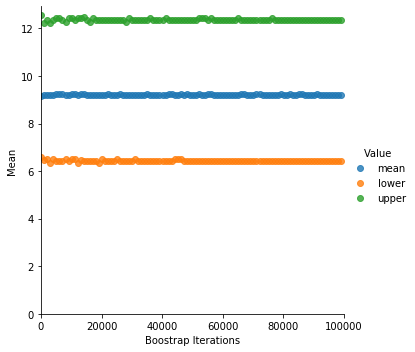

In [0]:
# Call your bootstrap function and plot the results
boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def bootstrap_mean_ci(sample, sample_size, n_iterations, ci):
  samples = np.zeros((n_iterations, sample_size))
  for i in range(n_iterations):
    samples[i, :] = np.random.choice(sample, (sample_size), replace=True)
  data_mean = np.mean(samples)
  shift = (100 - ci) / 2.0
  samples_means = np.mean(samples, axis=1)
  lower = np.percentile(samples_means, shift)
  upper = np.percentile(samples_means, 100 - shift)
  return data_mean, lower, upper

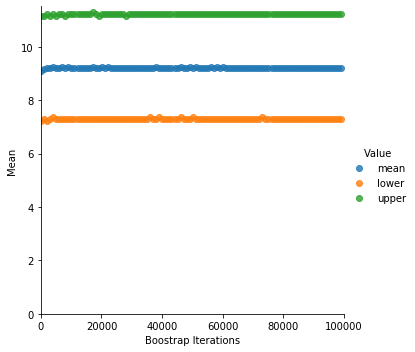

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

##**II. Using the Vehicle Dataset and Implementing Permutation Testing**

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
current_fleat = df['Current fleet']
new_fleat = df['New Fleet']
new_fleat = new_fleat[~np.isnan(new_fleat)]

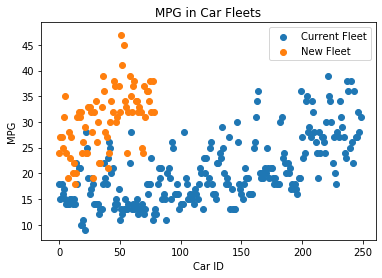

In [57]:
plt.scatter(range(len(current_fleat)), current_fleat, label='Current Fleet')
plt.scatter(range(len(new_fleat)), new_fleat, label='New Fleet')
plt.xlabel('Car ID')
plt.ylabel('MPG')
plt.title('MPG in Car Fleets')
plt.legend()

Text(0.5, 1.0, 'Histogram of Current Fleat')

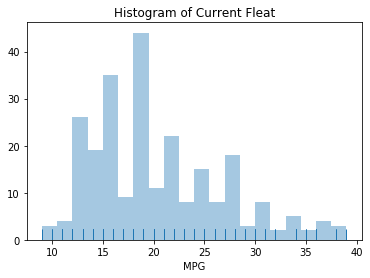

In [58]:
sns.distplot(current_fleat, bins=20, kde=False, rug=True, axlabel='MPG').set_title('Histogram of Current Fleat')

Text(0.5, 1.0, 'Histogram of New Fleat')

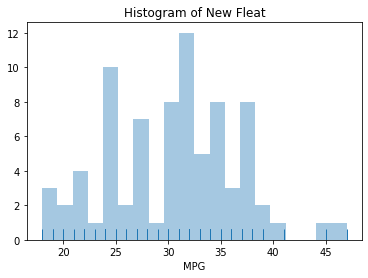

In [59]:
sns.distplot(new_fleat, bins=20, kde=False, rug=True, axlabel='MPG').set_title('Histogram of New Fleat')

In [0]:
mean_current, lower_current, upper_current = bootstrap_mean_ci(current_fleat, current_fleat.shape[0], 100000, 95)
mean_new, lower_new, upper_new = bootstrap_mean_ci(new_fleat, new_fleat.shape[0], 100000, 95)

In [61]:
print('Current Fleat:')
print('  Mean:', mean_current)
print('  Lower Mean (95% CI):', lower_current)
print('  Upper Mean (95% CI):', upper_current)
print()
print('New Fleat:')
print('  Mean:', mean_new)
print('  Lower Mean (95% CI):', lower_new)
print('  Upper Mean (95% CI):', upper_new)

Current Fleat:
  Mean: 20.143266626506023
  Lower Mean (95% CI): 19.3574297188755
  Upper Mean (95% CI): 20.951807228915662

New Fleat:
  Mean: 30.48024240506329
  Lower Mean (95% CI): 29.139240506329113
  Upper Mean (95% CI): 31.82278481012658


In [78]:
def permutation_test_mean(arrA, arrB, n_permutations):
  concat = np.concatenate((arrA, arrB))
  arrAsize = len(arrA)
  meanA = np.mean(arrA)
  meanB = np.mean(arrB)
  meanDiffObs = meanB - meanA
  count = 0
  for i in range(n_permutations):
    perm = np.random.permutation(concat)
    permA = perm[:arrAsize]
    permB = perm[arrAsize:]
    meanPermA = np.mean(permA)
    meanPermB = np.mean(permB)
    if meanPermB - meanPermA > meanDiffObs:
      count = count + 1
  return count / n_permutations

0.000000


Text(0.5, 1.0, 'Changes in P-Value According to Permutations Used')

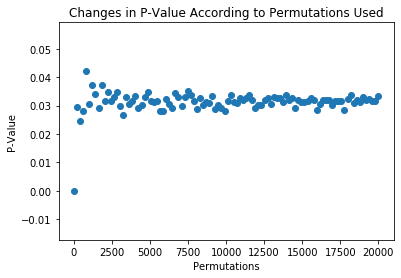

In [91]:
# This code uses the example of the class just to check if the permutation_test_mean function worked.
# old = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
# new = [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]
# iterations = np.linspace(1, 20000, 100, dtype=np.int32)
# p_values = []
# for i in iterations:
#   p_values.append(permutation_test_mean(old, new, i))

# plt.scatter(iterations, p_values)
# plt.xlabel('Permutations')
# plt.ylabel('P-Value')
# plt.title('Changes in P-Value According to Permutations Used')

Text(0.5, 1.0, 'Changes in P-Value According to Permutations Used')

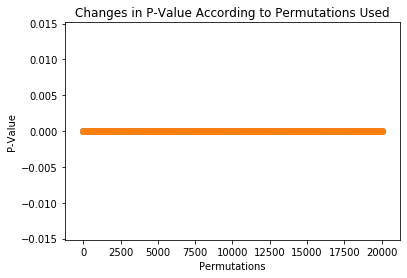

In [92]:
iterations = np.linspace(1, 20000, 100, dtype=np.int32)
p_values = []
for i in iterations:
  p_values.append(permutation_test_mean(current_fleat, new_fleat, i))

plt.scatter(iterations, p_values)
plt.xlabel('Permutations')
plt.ylabel('P-Value')
plt.title('Changes in P-Value According to Permutations Used')

plt.scatter(iterations, p_values)
plt.xlabel('Permutations')
plt.ylabel('P-Value')
plt.title('Changes in P-Value According to Permutations Used')